<H1> Oracle OCI Generative AI Training
    

   

#### Funmi Looi-Somoye

### Introduction
We can interact with the OCI Generative AI service to generate text based on a given prompt. This notebook is to get familiarized with the Generative AI interference API. 

##### Set Up Tasks:
1. Oracle Cloud Infrastructure tenant and a user account created in that tenant.
2. Install and use OCI CLI on Mac OS from Scratch https://www.linkedin.com/pulse/how-install-use-oci-cli-mac-os-from-scratch-valentin-lemains


Install required packages for demos

In [1]:
pip install oci

Note: you may need to restart the kernel to use updated packages.


# (A) Model Demos

1. Generation Model
2. Summarization Model
3. Embedding Models


### Section 1: Generation Model

Model: Cohere Command

##### Model Parameters:

Max Tokens - The maximum number of tokens the model generates per response.

Temperature - Controls how 'creative' the model is. Temperature = 0 makes the model deterministic.

Frequency Penality - Assigns penality when a token appears frequently and produces less repetitive text.

Top P - Model picks the next top tokens based on the sum of their probabilities. e.g. p= 0.15 model picks top 15% of tokens.

Top K - Model picks the next top 'k' tokens and ignore others.

##### Prompt: How does a telescope work?

In [9]:
# coding: utf-8
# Copyright (c) 2023, Oracle and/or its affiliates.  All rights reserved.
# This software is dual-licensed to you under the Universal Permissive License (UPL) 1.0 as shown at https://oss.oracle.com/licenses/upl or Apache License 2.0 as shown at http://www.apache.org/licenses/LICENSE-2.0. You may choose either license.

##########################################################################
# chat_demo.py
# Supports Python 3
##########################################################################
# Info:
# Get texts from LLM model for given prompts using OCI Generative AI Service.
##########################################################################
# Application Command line(no parameter needed)
# python chat_demo.py
##########################################################################
import oci

# Setup basic variables
# Auth Config
# Needed to load my OCI credentials and configuration settings from my personal profile. 
compartment_id = "ocid1.tenancy.oc1..aaaaaaaaci4kujpeg6s5pemxg5qeki2fquyvkz6ad63266k3aymsekrlxfja"
CONFIG_PROFILE = "DEFAULT"
config = oci.config.from_file('~/.oci/config', CONFIG_PROFILE)

# Service endpoint - the url endpoint for the Generative AI service. Only available in Frankfurt and Chicago
endpoint = "https://inference.generativeai.eu-frankfurt-1.oci.oraclecloud.com"

#Creating an instance of the Generative AI inference client
generative_ai_inference_client = oci.generative_ai_inference.GenerativeAiInferenceClient(config=config, service_endpoint=endpoint, retry_strategy=oci.retry.NoneRetryStrategy(), timeout=(10,240))
chat_detail = oci.generative_ai_inference.models.ChatDetails()

chat_request = oci.generative_ai_inference.models.CohereChatRequest()


#Type your message here
chat_request.message = "How does a telescope work"

#Parameters
chat_request.max_tokens = 600
chat_request.temperature = 1
chat_request.frequency_penalty = 0
chat_request.top_p = 0.75
chat_request.top_k = 0


chat_detail.serving_mode = oci.generative_ai_inference.models.OnDemandServingMode(model_id="ocid1.generativeaimodel.oc1.eu-frankfurt-1.amaaaaaask7dceyazi3cpmptwa52f7dgwyskloughcxtjgrqre3pngwtig4q")
chat_detail.chat_request = chat_request
chat_detail.compartment_id = compartment_id
chat_response = generative_ai_inference_client.chat(chat_detail)
# Print result
print("**************************Chat Result**************************")
print(vars(chat_response))

**************************Chat Result**************************
{'status': 200, 'headers': {'content-type': 'application/json', 'opc-request-id': '4833488FBACD4F779DDE9E6878C2CAF0/80590522437AC0B5B3E1097BC10AB9AB/8A59ACA49B89BE852366672C26301797', 'content-encoding': 'gzip', 'content-length': '1190'}, 'data': {
  "chat_response": {
    "api_format": "COHERE",
    "chat_history": [
      {
        "message": "How does a telescope work",
        "role": "USER"
      },
      {
        "message": "Telescopes use lenses or mirrors to gather and focus light from celestial objects, allowing us to see and study them in greater detail. The key components of a telescope include the objective, which is the primary lens or mirror that collects light, and the eyepiece, which magnifies the image. \n\nHere's a simplified breakdown of how different types of telescopes work:\n\n1. Refractor Telescope: These telescopes use lenses to focus light. Light enters through the objective lens, which refracts (

### Section 2: Summarization Model

Model: Cohere Command


Prompt: Summarize: The general election is to elect Members of Parliament - or MPs - to the House of Commons. The UK is divided into 650 areas, called constituencies, each of which elects one MP to represent local residents. Most candidates represent a political party, but some are independent.

In [6]:
# coding: utf-8
# Copyright (c) 2023, Oracle and/or its affiliates.  All rights reserved.
# This software is dual-licensed to you under the Universal Permissive License (UPL) 1.0 as shown at https://oss.oracle.com/licenses/upl or Apache License 2.0 as shown at http://www.apache.org/licenses/LICENSE-2.0. You may choose either license.

##########################################################################
# chat_demo.py
# Supports Python 3
##########################################################################
# Info:
# Get texts from LLM model for given prompts using OCI Generative AI Service.
##########################################################################
# Application Command line(no parameter needed)
# python chat_demo.py
##########################################################################
import oci

# Setup basic variables
# Auth Config
# TODO: Please update config profile name and use the compartmentId that has policies grant permissions for using Generative AI Service
compartment_id = "ocid1.tenancy.oc1..aaaaaaaaci4kujpeg6s5pemxg5qeki2fquyvkz6ad63266k3aymsekrlxfja"
CONFIG_PROFILE = "DEFAULT"
config = oci.config.from_file('~/.oci/config', CONFIG_PROFILE)

# Service endpoint
endpoint = "https://inference.generativeai.eu-frankfurt-1.oci.oraclecloud.com"

generative_ai_inference_client = oci.generative_ai_inference.GenerativeAiInferenceClient(config=config, service_endpoint=endpoint, retry_strategy=oci.retry.NoneRetryStrategy(), timeout=(10,240))
chat_detail = oci.generative_ai_inference.models.ChatDetails()

chat_request = oci.generative_ai_inference.models.CohereChatRequest()
chat_request.message = "Summarize: The general election is to elect Members of Parliament - or MPs - to the House of Commons. The UK is divided into 650 areas, called constituencies, each of which elects one MP to represent local residents. Most candidates represent a political party, but some are independent."
chat_request.max_tokens = 600
chat_request.temperature = 1
chat_request.frequency_penalty = 0
chat_request.top_p = 0.75
chat_request.top_k = 0


chat_detail.serving_mode = oci.generative_ai_inference.models.OnDemandServingMode(model_id="ocid1.generativeaimodel.oc1.eu-frankfurt-1.amaaaaaask7dceyazi3cpmptwa52f7dgwyskloughcxtjgrqre3pngwtig4q")
chat_detail.chat_request = chat_request
chat_detail.compartment_id = compartment_id
chat_response = generative_ai_inference_client.chat(chat_detail)
# Print result
print("**************************Chat Result**************************")
print(vars(chat_response))

**************************Chat Result**************************
{'status': 200, 'headers': {'content-type': 'application/json', 'opc-request-id': 'D06494C7F9A04B7CB4D5AAE40C63D595/6868AA74E43A1CEA76F0EEDD82F39D4A/7602E35C56FD46B36F1C1A233EE1B35A', 'content-encoding': 'gzip', 'content-length': '494'}, 'data': {
  "chat_response": {
    "api_format": "COHERE",
    "chat_history": [
      {
        "message": "Summarize: The general election is to elect Members of Parliament - or MPs - to the House of Commons. The UK is divided into 650 areas, called constituencies, each of which elects one MP to represent local residents. Most candidates represent a political party, but some are independent.",
        "role": "USER"
      },
      {
        "message": "The UK's general election divides the country into 650 constituencies, each voting for one MP to represent them in the House of Commons. These MPs are selected either through a political party or run as independent candidates.",
        "r

### Section 3: Embedding Models

Embeddings are numerical representations of a piece of text converted to number sequences. This model produces 1024 embeddings

Model: cohere.embed-english-v3.0


In [8]:
# coding: utf-8
# Copyright (c) 2023, Oracle and/or its affiliates.  All rights reserved.
# This software is dual-licensed to you under the Universal Permissive License (UPL) 1.0 as shown at https://oss.oracle.com/licenses/upl or Apache License 2.0 as shown at http://www.apache.org/licenses/LICENSE-2.0. You may choose either license.

##########################################################################
# embed_text_demo.py
# Supports Python 3
##########################################################################
import oci

# Setup basic variables
# Auth Config
# TODO: Please update config profile name and use the compartmentId that has policies grant permissions for using Generative AI Service
CONFIG_PROFILE = "DEFAULT"
config = oci.config.from_file('~/.oci/config', CONFIG_PROFILE)
# Service endpoint
endpoint = "https://inference.generativeai.eu-frankfurt-1.oci.oraclecloud.com"
generative_ai_inference_client = oci.generative_ai_inference.GenerativeAiInferenceClient(config=config, service_endpoint=endpoint, retry_strategy=oci.retry.NoneRetryStrategy(), timeout=(10,240))
inputs = ["What is the capital of France"]
embed_text_detail = oci.generative_ai_inference.models.EmbedTextDetails()
embed_text_detail.serving_mode = oci.generative_ai_inference.models.OnDemandServingMode(model_id="cohere.embed-english-v3.0")
embed_text_detail.inputs = inputs
embed_text_detail.truncate = "NONE"
embed_text_detail.compartment_id = "ocid1.tenancy.oc1..aaaaaaaaci4kujpeg6s5pemxg5qeki2fquyvkz6ad63266k3aymsekrlxfja"
embed_text_response = generative_ai_inference_client.embed_text(embed_text_detail)
# Print result
print("**************************Embed Texts Result**************************")
print(embed_text_response.data)

**************************Embed Texts Result**************************
{
  "embeddings": [
    [
      0.0041122437,
      0.022613525,
      -0.039215088,
      0.039001465,
      -0.0362854,
      -0.029510498,
      -0.0085372925,
      -0.039886475,
      -0.00080776215,
      0.055755615,
      -0.021514893,
      -0.033447266,
      0.015350342,
      -0.025390625,
      -0.028335571,
      -0.005596161,
      0.039001465,
      -0.02758789,
      0.009727478,
      -0.019470215,
      -0.008636475,
      0.020904541,
      -0.0039100647,
      0.012672424,
      0.013938904,
      -0.030029297,
      -0.0033912659,
      0.0024089813,
      -0.009094238,
      -0.018707275,
      0.0053215027,
      0.02015686,
      0.05117798,
      -0.010757446,
      -0.017791748,
      0.045196533,
      0.016418457,
      -0.027816772,
      0.009590149,
      -0.006816864,
      -0.01928711,
      -0.011367798,
      -0.0030117035,
      -0.03363037,
      -0.059509277,
      0.007461548,

List of sentences to generate embeddings from the Oracle OCI Generative AI service

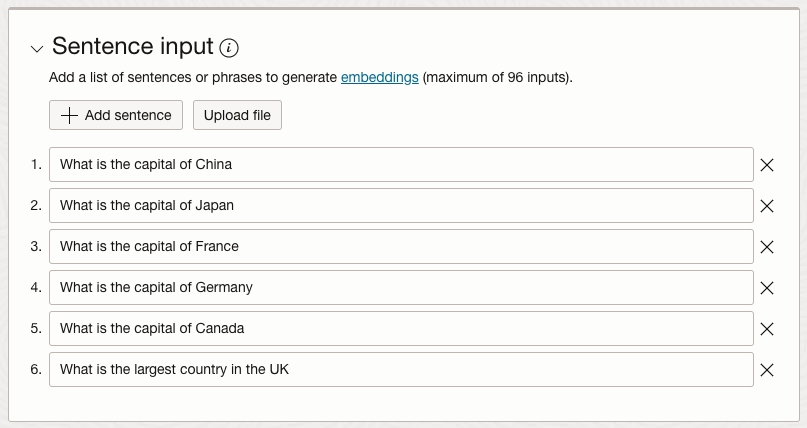


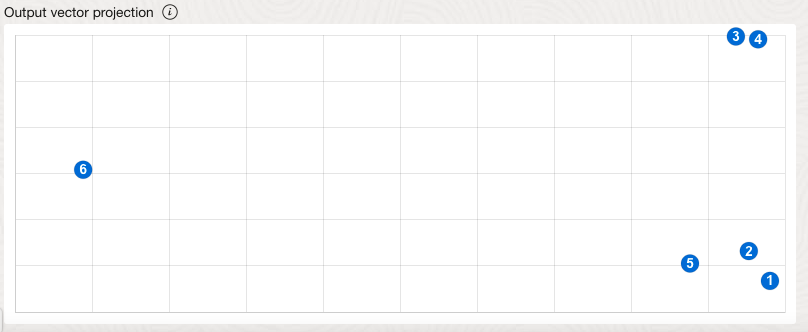

The model is capturing the context and the meaning of each piece of text and it is representing them as embeddings. Each dimension of an embedding represents a certain universal characteristic about the text.

The following plot compresses these embeddings to 2-dimensions. Vectors that are more similar have points close together. 

Points 1-5 are places on the right side of the x-axis to demonstrate how they are all referring to captial cities. 

Point 6 referes to a county and therefore is placed on the left side of the x-axis.

# (B) Prompt Engineering

1. Chain-of-thought prompting

### Chain-of-Thought Prompting 

The process of providing examples in the prompt to show responses that include a reasoning step.

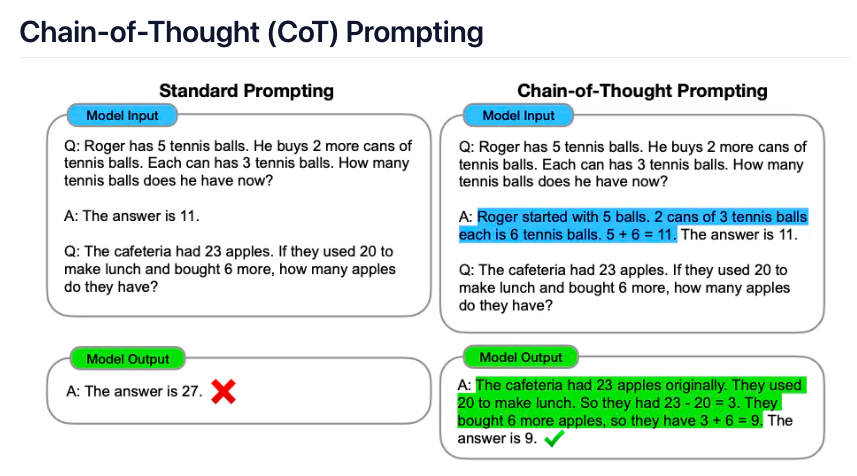

Source: https://www.promptingguide.ai/techniques/cot

#### Trialing Prompt Engineering the Cohere Command Model